In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import calendar
import datetime

# Question 2

In this question, I will visualize the datasets by examining how many visitors visit these restaurants each month. I will use a bar plot to give details about how many visitors the two websites recorded for each month, and I will use a line plot to show the trend of the recorded data.

1. Prepare the dataset

In [132]:
air_visits = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_reserve.csv'))
hpg_visits = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'hpg_reserve.csv'))


2. Initialise the plot

In [133]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(10, 20))

# Set title and x,y labels
ax1.set_title("No. of visitors each month (2016.01 - 2017.05)")
ax2.set_title("No. of visitors overall (2016.01 - 2017.05)")

ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax1.set_ylabel('No. of visitors')
ax2.set_ylabel('No. of visitors (10 million people)')

Text(0,0.5,'No. of visitors (10 million people)')

3. Scrape the results

In [134]:
month_labels = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05']

hpg_visitors = [0 for i in range(len(month_labels))]
air_visitors = [0 for i in range(len(month_labels))]

for i in range(len(hpg_visits)):
    month = month_labels.index(hpg_visits.loc[i]['visit_datetime'][:7])
    hpg_visitors[month] += hpg_visits.loc[i]['reserve_visitors']

for i in range(len(air_visits)):
    month = month_labels.index(air_visits.loc[i]['visit_datetime'][:7])
    air_visitors[month] += air_visits.loc[i]['reserve_visitors']

4. Plot the results

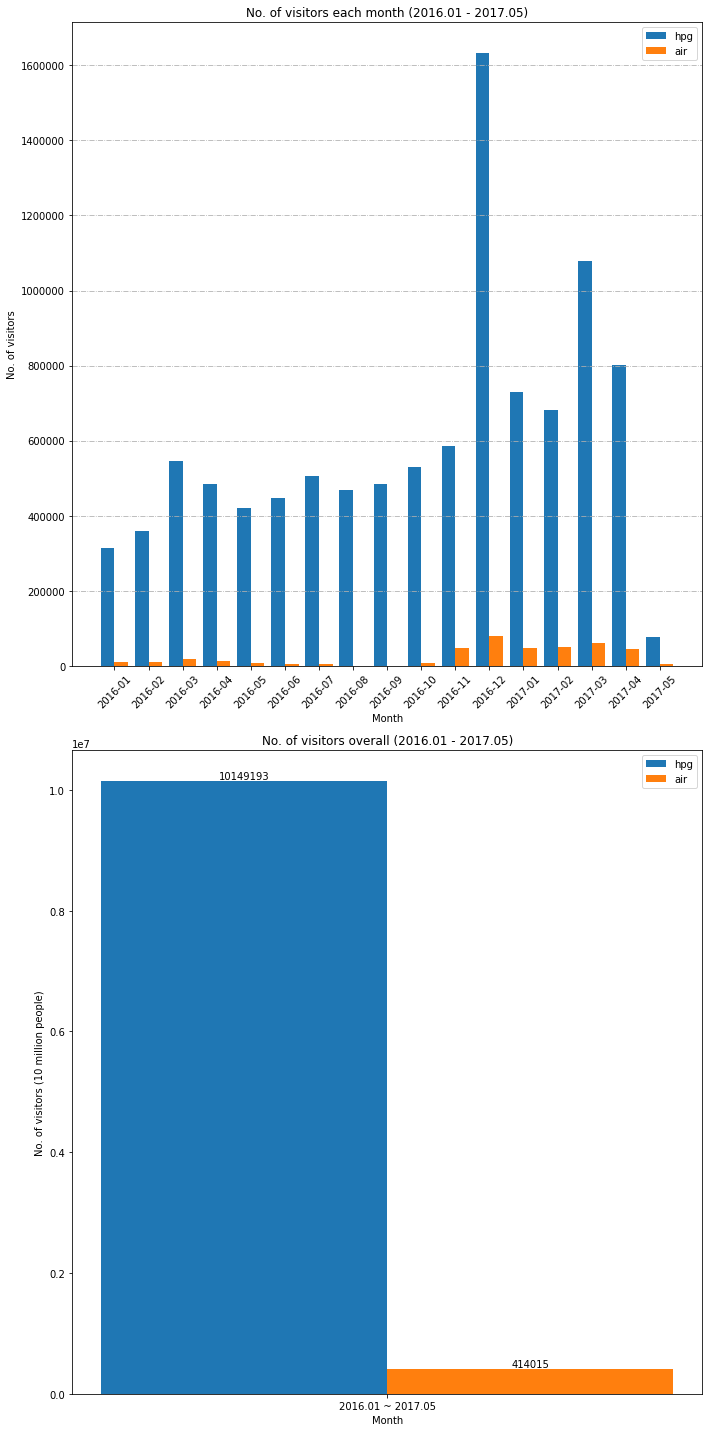

In [135]:
# Set attributes
label_location_month = np.arange(len(month_labels))
width = 0.4

# Plot the monthly bar plot
ax1.grid(axis='y', linestyle='-.')
ax1.bar(label_location_month - width / 2, hpg_visitors, width, label='hpg')
ax1.bar(label_location_month + width / 2, air_visitors, width, label='air')
ax1.set_xticks(label_location_month)
ax1.set_xticklabels(month_labels, rotation=45)
ax1.legend()

# Set attributes
overall_hpg = sum(hpg_visitors)
overall_air = sum(air_visitors)
overall_labels = ['2016.01 ~ 2017.05']
label_location_overall = np.arange(1)

# Plot the overall bar plot
ax2.bar(label_location_overall - width / 2, [overall_hpg], width, label='hpg')
ax2.bar(label_location_overall + width / 2, [overall_air], width, 
label='air')
ax2.set_xticks(label_location_overall)
ax2.set_xticklabels(overall_labels)

# Show exact figures for the overall plot
plt.text(-0.2, overall_hpg + 0.05, '%d' % overall_hpg, ha='center', va='bottom', fontsize=10)
plt.text(0.2, overall_air + 0.05, '%d' % overall_air, ha='center', va='bottom', fontsize=10)

ax2.legend()

fig.tight_layout()

plt.show()

5. Conclusion

From the two plots, we can see clearly that *hpg* website generate more visitors than *air* website. Moreover, in each month from 2016-01 to 2017-05 *hpg* also generate more visitors than *air* website. 

# Question 3

1. Prepare dataset

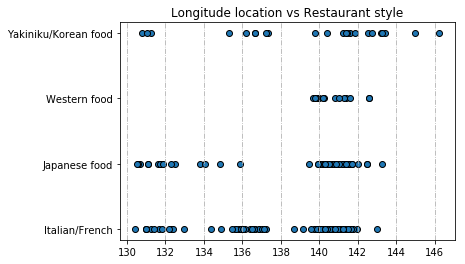

In [85]:
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))

# Remove entries we do not consider. Here we look at 4 styles:
# Italian/French, Japanese, Western, Korean
target_styles = ['Italian/French', 'Yakiniku/Korean food', 'Japanese food', 'Western food']

selected_styles = air_store_info[air_store_info.air_genre_name.isin(target_styles)]

longitude_noise = 2 * np.random.rand(len(selected_styles)) + selected_styles['longitude']

plt.scatter(longitude_noise,selected_styles['air_genre_name'], edgecolors='k')
plt.title('Longitude location vs Restaurant style')
plt.grid(axis='x', linestyle='-.')
plt.show()

**Conclusion**:  

Yakiniku/Korean restaurants are located on a wide range, with small clusters in longitude 136~138 and 140~144.  

Western restaurants only appear in range around longitude 140~142, there are none located outside this range.  

Japanese food are mainly located in longitude 130~132 and 140~142, with others located sparsely.  

Italian/French restaurants are mainly located in longitude 130~132, 134~138, 140~142.  

Overall, we can see that restaurants are mainly located in longitude 130~132, 136~138 and 140~142. This suggests that these areas are more prosperous that other areas. 

# Question 4

We will use the results from Q2 to plot the result:

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

# Store the number of restaurants
num_restaurant_month = len(set(air_visits['air_store_id']))

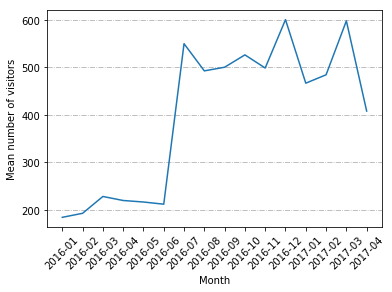

In [131]:
# Remov 2017-05 as no data at that month
plt.plot(month_labels[:-1], np.array(air_visitors[:-1]) / num_restaurant_month)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-.')
plt.xlabel('Month')
plt.ylabel('Mean number of visitors')
plt.show()

Conclusion:  

From months 2016-01 to 2016-06, the number of visitors stayed roughly the same with little fluctuation. Then there is a huge sudden climb between 2016-06 and 2016-07. After that the numbers vary from 400000 to 500000, with a significant decrease from 2017-03 to 2017-04. Overall, the number of visitors is increasing each month.


# Question 5

1. Calculate visitors for each day

In [51]:
date_summary = []
previous_date = hpg_visits.loc[0]['visit_datetime'][:10]
num_visitors = 0

for i in range(len(hpg_visits)):
    date = hpg_visits.loc[i]['visit_datetime'][:10]
    visitors = hpg_visits.loc[i]['reserve_visitors']
    if previous_date == date:
        num_visitors += visitors
    else:
        date_summary.append(num_visitors)
        previous_date = date
        num_visitors = visitors



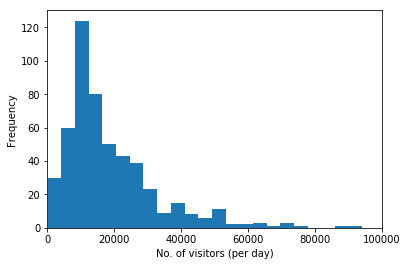

In [99]:
plt.hist(date_summary, bins=40)

# We set limit to 100000 to remove outliers.
plt.xlim([0, 100000])
plt.ylabel("Frequency")
plt.xlabel("No. of visitors (per day)")
plt.show()

**Conclusion** 

From the histogram, we can see that the average number of visitors per day lies in the range 0~20000, with the peak frequency at around 10000 visitors per day. There are a few days with visitors in range 20000~40000, and very rare cases where visitors exceed 60000. In general,the data is skewed to the left.

# Question 6

1. Calculate the time interval

In [114]:
def interval(vis_date, res_date):
    vis = datetime.datetime.strptime(vis_date, '%Y-%m-%d %H:%M:%S')
    res = datetime.datetime.strptime(res_date, '%Y-%m-%d %H:%M:%S')
    delta = vis - res
    return delta.days * 24 + delta.seconds / 3600

In [119]:
air_reserve = pd.read_csv('Data/air_reserve.csv')
store_style = {}
style_time = {}

for i in range(len(air_store_info)):
    id_str = air_store_info.loc[i]['air_store_id']
    genre = air_store_info.loc[i]['air_genre_name']
    store_style[id_str] = genre 

for i in range(len(air_reserve)):
    id_str = air_reserve.loc[i]['air_store_id']
    time_diff = interval(air_reserve.loc[i]['visit_datetime'], air_reserve.loc[i]['reserve_datetime'])
    if style_time.get(store_style[id_str]) is None:
        style_time[store_style[id_str]] = [time_diff]
    else:
        style_time[store_style[id_str]].append(time_diff)




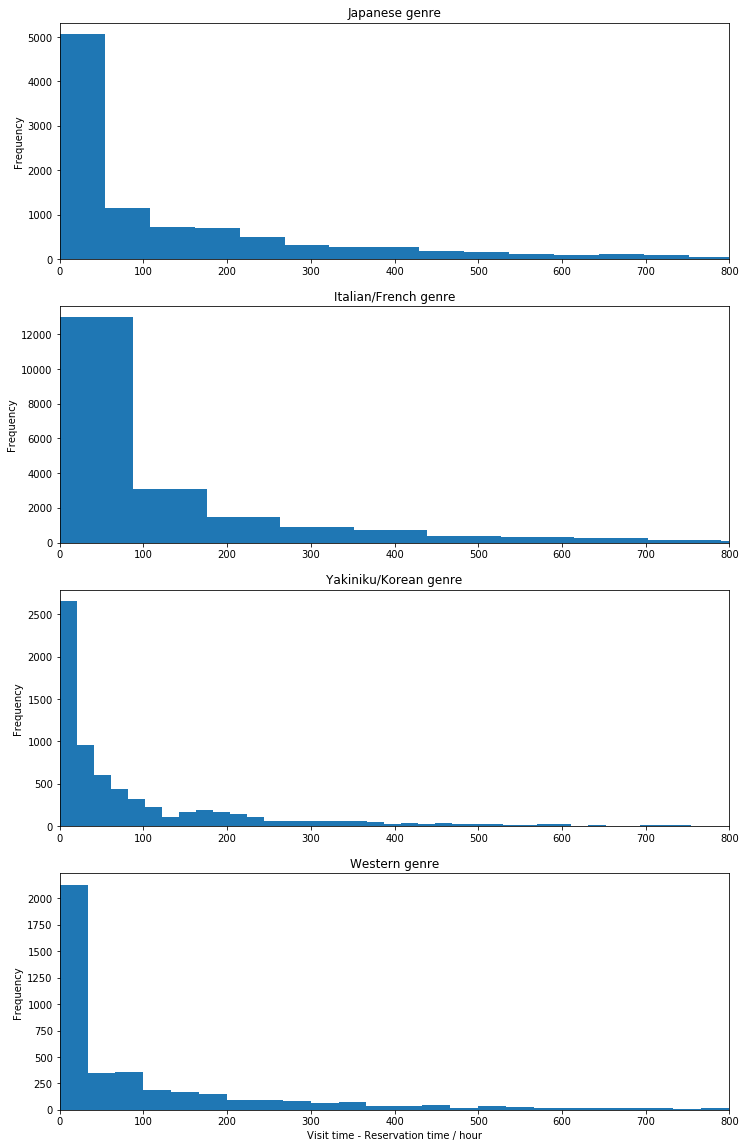

In [136]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(12,20))
ax1.hist(style_time['Japanese food'], bins=100)
ax1.set_xlim([0, 800])
ax1.set_title('Japanese genre')
ax1.set_ylabel('Frequency')
ax2.hist(style_time['Italian/French'], bins=100)
ax2.set_xlim([0, 800])
ax2.set_title('Italian/French genre')
ax2.set_ylabel('Frequency')
ax3.hist(style_time['Yakiniku/Korean food'], bins=100)
ax3.set_xlim([0, 800])
ax3.set_title('Yakiniku/Korean genre')
ax3.set_ylabel('Frequency')
ax4.hist(style_time['Western food'], bins=100)
ax4.set_xlim([0, 800])
ax4.set_title('Western genre')
ax4.set_xlabel('Visit time - Reservation time / hour')
ax4.set_ylabel('Frequency')
plt.show()

**Conclusion**:

In general, we see that the average difference between visit time and reservation time is less than 20 hours (shorter than 1 day). 